In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

When importing dataset, by sorting with MatchID, dataset is now timeseries dataset. Every feature is (home-away) and result is decided with score diff. We have total 50 feature differences.

In [9]:
data=pd.read_csv('/content/drive/MyDrive/Dataset.csv').drop(['Unnamed: 0'],axis=1).sort_values(by=['MatchID'])
df_home=data.filter(regex='home').rename(columns=lambda x:x.replace('_home',''))
df_away=data.filter(regex='away').rename(columns=lambda x:x.replace('_away',''))
df_diff=df_home-df_away
cond=[(df_diff['Score']<0),(df_diff['Score']==0),(df_diff['Score']>0)]
val=['Away','Draw','Home']
df_diff['Result']=np.select(cond,val)
df_diff=df_diff.drop(columns=['Score'])
X=df_diff.iloc[:,:-1]
y=df_diff.iloc[:,-1:]

## Train,Test,Validation set split
Split train,test,validation set into 0.8,0.1,0.1

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((2546, 50), (2546, 1), (318, 50), (318, 1), (319, 50), (319, 1))

## Feature selection

Feature ranking:
1. feature Assists (0.038)
2. feature Passes (0.033)
3. feature Passes per match (0.032)
4. feature Big Chances Created (0.031)
5. feature Clean sheets (0.025)
6. feature Goals per match (0.024)
7. feature Shots on target (0.024)
8. feature Blocked shots (0.023)
9. feature Goals with right foot (0.023)
10. feature Goals with left foot (0.022)
11. feature Hit woodwork (0.021)
12. feature Goals (0.021)
13. feature Through balls (0.021)
14. feature Big chances missed (0.021)
15. feature Tackle success % (0.020)
16. feature Penalties scored (0.020)
17. feature Shots (0.020)
18. feature Clearances off line (0.020)
19. feature Successful 50/50s (0.020)
20. feature Cross accuracy % (0.020)
21. feature Own goals (0.020)
22. feature Last man tackles (0.020)
23. feature Shooting accuracy % (0.019)
24. feature Crosses (0.019)
25. feature Offsides (0.019)
26. feature Red cards (0.019)
27. feature Tackles (0.019)
28. feature Freekicks scored (0.019)
29. feature Errors leading to go

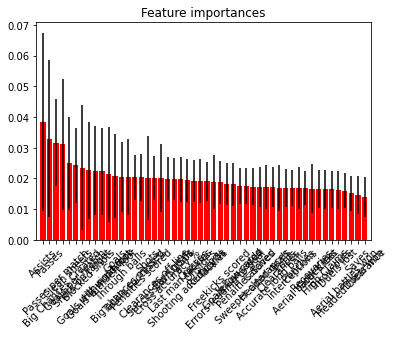

In [12]:
forest=RandomForestClassifier()
forest.fit(X_train,y_train.values.ravel())
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

classifying with win/draw/lose is useless.